In [ ]:
!pip install plotly

In [ ]:
pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
import plotly.graph_objs as go
#import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'


In [ ]:
from chart_studio import plotly

In [ ]:
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')
df = pd.read_csv('/content/Seattle_Hotels.csv', encoding="latin-1")
df.head()
print('We have ', len(df), 'hotels in the data')

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...


We have  152 hotels in the data


## **To read the while value of the record**

In [ ]:
def print_description(index):
    example = df[df.index == index][['desc', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])

In [ ]:
print_description(10)

Soak up the vibrant scene in the Living Room Bar and get in the mix with our live music and DJ series before heading to a memorable dinner at TRACE. Offering inspired seasonal fare in an award-winning atmosphere, it's a not-to-be-missed culinary experience in downtown Seattle. Work it all off the next morning at FIT®, our state-of-the-art fitness center before wandering out to explore many of the area's nearby attractions, including Pike Place Market, Pioneer Square and the Seattle Art Museum. As always, we've got you covered during your time at W Seattle with our signature Whatever/Whenever® service - your wish is truly our command.
Name: W Seattle


In [ ]:
print_description(100)

In [ ]:
df[["desc","name"]].iloc[100]

desc    On a budget in Seattle or looking for somethin...
name                                   The Baroness Hotel
Name: 100, dtype: object

## **get_top_n_words**
### This function takes a text corpus and computes the frequency of each word.

*   ### **CountVectorizer:** This is used to convert the text data into a matrix of token counts. By default, it tokenizes the text into words.
*   ### **bag_of_words.transform(corpus):** Transforms the corpus into a document-term matrix (DTM) where each row corresponds to a document and each column corresponds to a word from the vocabulary.
*   ### **sum_words.sum(axis=0):** Sums up the counts of each word across all documents to get the total frequency of each word.
*   ### **sorted(words_freq, key=lambda x: x[1], reverse=True):** Sorts the words by their frequency in descending order.
*   ### **return words_freq[:n]:** Returns the top n words with the highest frequencies.



<Figure size 1000x800 with 0 Axes>

<Axes: ylabel='desc'>

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Words')

Text(0.5, 1.0, 'Top 20 words in hotel description before removing stop words')

<Figure size 1000x800 with 0 Axes>

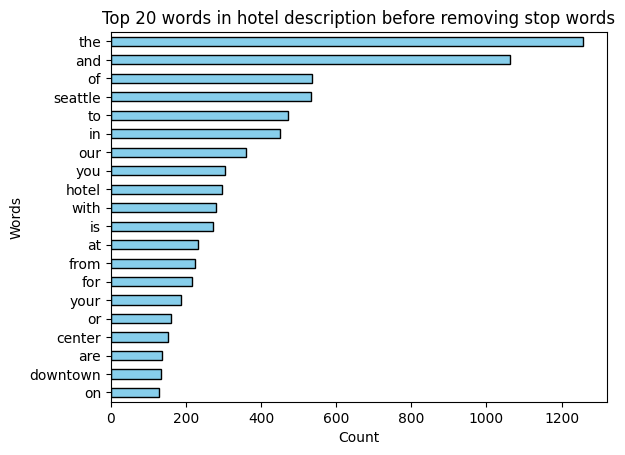

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming df['desc'] is your corpus
common_words = get_top_n_words(df['desc'], 20)
df1 = pd.DataFrame(common_words, columns=['desc', 'count'])

# Plotting with matplotlib
plt.figure(figsize=(10, 8))
df1.sort_values(by='count', ascending=True).plot(kind='barh', x='desc', y='count', legend=False, color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top 20 words in hotel description before removing stop words')
plt.show()


## get significant words

* ## **CountVectorizer(stop_words='english'):** This CountVectorizer removes common English stop words from the analysis, focusing only on significant words.
* ## **plt.figure(figsize=(10, 8)):** Sets the size of the plot.
* ## **sns.barplot(x='count', y='desc', data=df2.sort_values(by='count', ascending=True), palette='coolwarm'):** Creates a horizontal bar chart using seaborn.This chart will have words on the y-axis and their counts on the x-axis, with colors from the 'coolwarm' palette for better visual appeal.*
* ## **plt.xlabel('Count') and plt.ylabel('Words'):** Label the axes.
* ## **plt.title('Top 20 words in hotel description after removing stop words'):** Sets the title of the chart.
* ## **plt.show():** Displays the plot.

<Figure size 1000x800 with 0 Axes>

<Axes: ylabel='desc'>

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Words')

Text(0.5, 1.0, 'Top 20 words in hotel description after removing stop words')

<Figure size 1000x800 with 0 Axes>

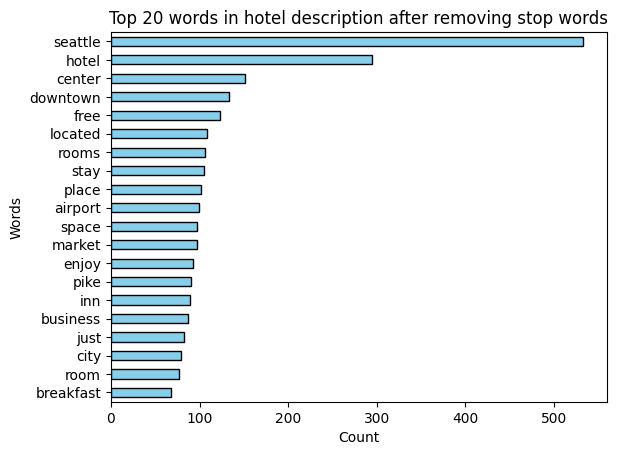

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming df['desc'] is your corpus
common_words = get_top_n_words(df['desc'], 20)
df2 = pd.DataFrame(common_words, columns=['desc', 'count'])

# Plotting with matplotlib
plt.figure(figsize=(10, 8))
df2.sort_values(by='count', ascending=True).plot(kind='barh', x='desc', y='count', legend=False, color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top 20 words in hotel description after removing stop words')
plt.show()


This code visualizes the top 20 most frequent words in the hotel descriptions after excluding common stop words. The horizontal bar chart effectively shows the frequency of these words, helping in understanding which words are most prevalent in the corpus.

## Extracting two Bigrams

* ### **CountVectorizer(ngram_range=(2, 2)):** This creates a CountVectorizer instance that extracts bigrams (two-word combinations) from the corpus.
* ### **vec.transform(corpus):** Transforms the text data into a document-term matrix (DTM) where each column represents a bigram.
* ### **sum_words.sum(axis=0):** Sums up the counts of each bigram across all documents to get the total frequency of each bigram.
* ### **sorted(words_freq, key=lambda x: x[1], reverse=True):** Sorts the bigrams by their frequency in descending order.
* ### **return words_freq[:n]:** Returns the top n bigrams based on frequency.


<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='desc'>

Text(0.5, 0, 'Bigrams')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 bigrams in hotel description before removing stop words')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'in the'),
  Text(1, 0, 'of the'),
  Text(2, 0, 'pike place'),
  Text(3, 0, 'place market'),
  Text(4, 0, 'to the'),
  Text(5, 0, 'downtown seattle'),
  Text(6, 0, 'from the'),
  Text(7, 0, 'and the'),
  Text(8, 0, 'space needle'),
  Text(9, 0, 'at the'),
  Text(10, 0, 'in seattle'),
  Text(11, 0, 'the seattle'),
  Text(12, 0, 'our hotel'),
  Text(13, 0, 'hotel is'),
  Text(14, 0, 'the city'),
  Text(15, 0, 'of our'),
  Text(16, 0, 'of seattle'),
  Text(17, 0, 'one of'),
  Text(18, 0, 'you ll'),
  Text(19, 0, 'the space')])

<Figure size 1400x800 with 0 Axes>

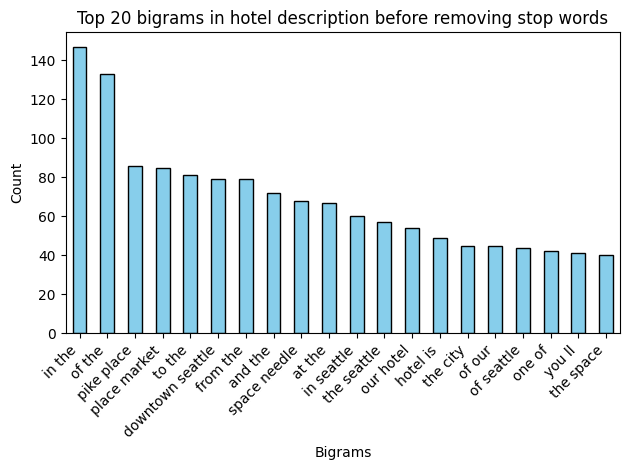

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming df['desc'] is your corpus
common_words = get_top_n_bigram(df['desc'], 20)
df3 = pd.DataFrame(common_words, columns=['desc', 'count'])

# Plotting with matplotlib
plt.figure(figsize=(14, 8))
df3.sort_values(by='count', ascending=False).plot(kind='bar', x='desc', y='count', legend=False, color='skyblue', edgecolor='black')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.title('Top 20 bigrams in hotel description before removing stop words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

<ipython-input-56-02822c699bde>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='desc', ylabel='count'>

Text(0.5, 0, 'Bigrams')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 bigrams in hotel description before removing stop words')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'in the'),
  Text(1, 0, 'of the'),
  Text(2, 0, 'pike place'),
  Text(3, 0, 'place market'),
  Text(4, 0, 'to the'),
  Text(5, 0, 'downtown seattle'),
  Text(6, 0, 'from the'),
  Text(7, 0, 'and the'),
  Text(8, 0, 'space needle'),
  Text(9, 0, 'at the'),
  Text(10, 0, 'in seattle'),
  Text(11, 0, 'the seattle'),
  Text(12, 0, 'our hotel'),
  Text(13, 0, 'hotel is'),
  Text(14, 0, 'the city'),
  Text(15, 0, 'of our'),
  Text(16, 0, 'of seattle'),
  Text(17, 0, 'one of'),
  Text(18, 0, 'you ll'),
  Text(19, 0, 'the space')])

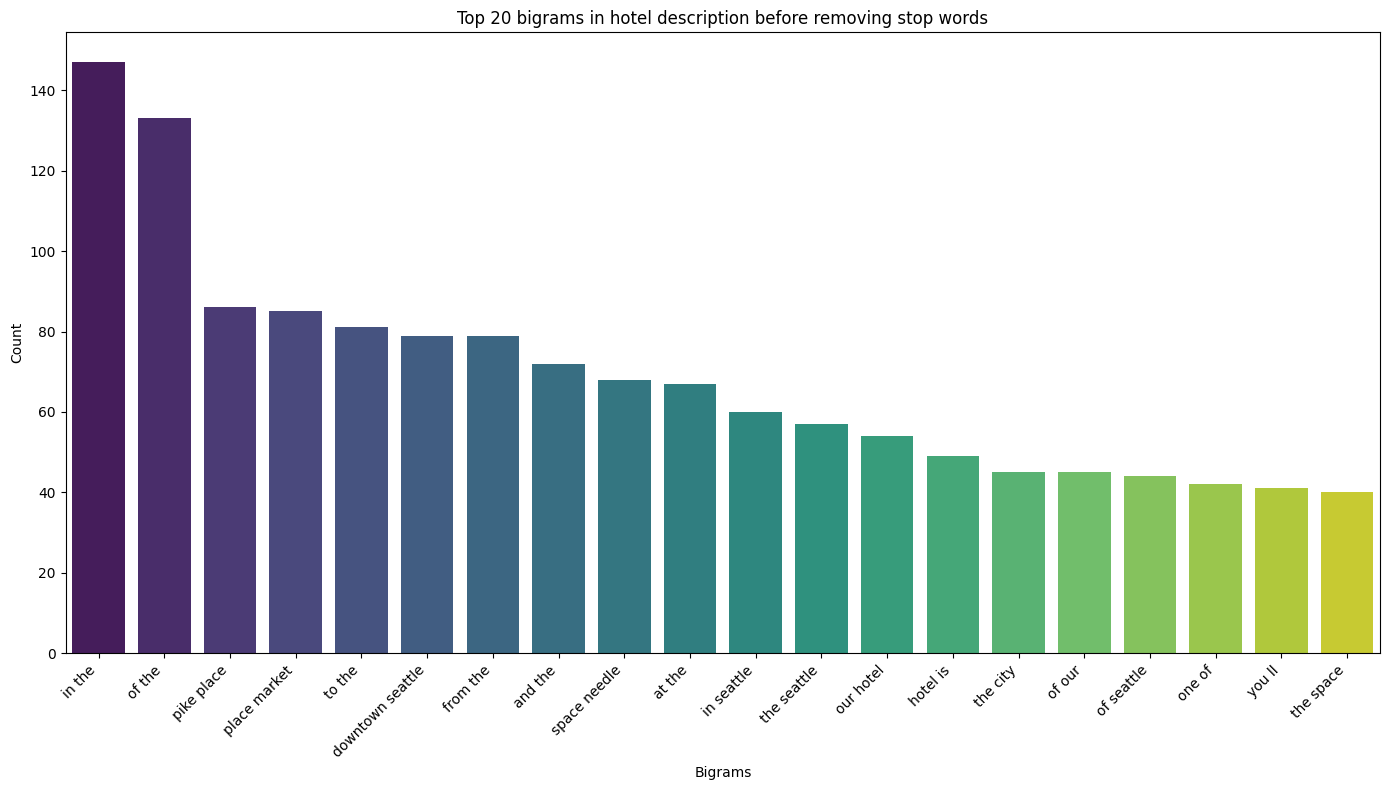

In [ ]:
import seaborn as sns

# Plotting with seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='desc', y='count', data=df3.sort_values(by='count', ascending=False), palette='viridis')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.title('Top 20 bigrams in hotel description before removing stop words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Extracting top biagrams:

* ### **CountVectorizer(ngram_range=(2, 2), stop_words='english'):** Initializes a CountVectorizer to capture bigrams (two-word combinations) while excluding common English stop words.
* ### **vec.fit(corpus):** Fits the CountVectorizer to the corpus of hotel descriptions.
* ### **vec.transform(corpus):** Transforms the text data into a document-term matrix where each column represents a bigram.
* ### **sum_words.sum(axis=0):** Computes the total frequency of each bigram across all descriptions.
* ### **sorted(words_freq, key=lambda x: x[1], reverse=True):** Sorts the bigrams by frequency in descending order.


<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='desc'>

Text(0.5, 0, 'Bigrams')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 bigrams in hotel description after removing stop words')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'pike place'),
  Text(1, 0, 'place market'),
  Text(2, 0, 'downtown seattle'),
  Text(3, 0, 'space needle'),
  Text(4, 0, 'wi fi'),
  Text(5, 0, 'guest rooms'),
  Text(6, 0, 'pacific northwest'),
  Text(7, 0, 'seattle hotel'),
  Text(8, 0, 'fitness center'),
  Text(9, 0, 'hotel seattle'),
  Text(10, 0, 'lake union'),
  Text(11, 0, '24 hour'),
  Text(12, 0, 'business center'),
  Text(13, 0, 'international airport'),
  Text(14, 0, 'seattle airport'),
  Text(15, 0, 'high speed'),
  Text(16, 0, 'seattle tacoma'),
  Text(17, 0, 'seattle center'),
  Text(18, 0, 'university washington'),
  Text(19, 0, 'convention center')])

<Figure size 1400x800 with 0 Axes>

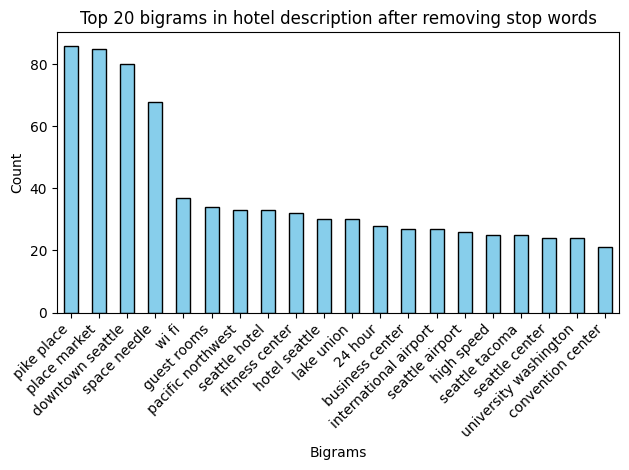

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming df['desc'] is your corpus
common_words = get_top_n_bigram(df['desc'], 20)
df4 = pd.DataFrame(common_words, columns=['desc', 'count'])

# Plotting with matplotlib
plt.figure(figsize=(14, 8))
df4.sort_values(by='count', ascending=False).plot(kind='bar', x='desc', y='count', legend=False, color='skyblue', edgecolor='black')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.title('Top 20 bigrams in hotel description after removing stop words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

<ipython-input-58-f7871fab4aae>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='desc', ylabel='count'>

Text(0.5, 0, 'Bigrams')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 bigrams in hotel description after removing stop words')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'pike place'),
  Text(1, 0, 'place market'),
  Text(2, 0, 'downtown seattle'),
  Text(3, 0, 'space needle'),
  Text(4, 0, 'wi fi'),
  Text(5, 0, 'guest rooms'),
  Text(6, 0, 'pacific northwest'),
  Text(7, 0, 'seattle hotel'),
  Text(8, 0, 'fitness center'),
  Text(9, 0, 'hotel seattle'),
  Text(10, 0, 'lake union'),
  Text(11, 0, '24 hour'),
  Text(12, 0, 'business center'),
  Text(13, 0, 'international airport'),
  Text(14, 0, 'seattle airport'),
  Text(15, 0, 'high speed'),
  Text(16, 0, 'seattle tacoma'),
  Text(17, 0, 'seattle center'),
  Text(18, 0, 'university washington'),
  Text(19, 0, 'convention center')])

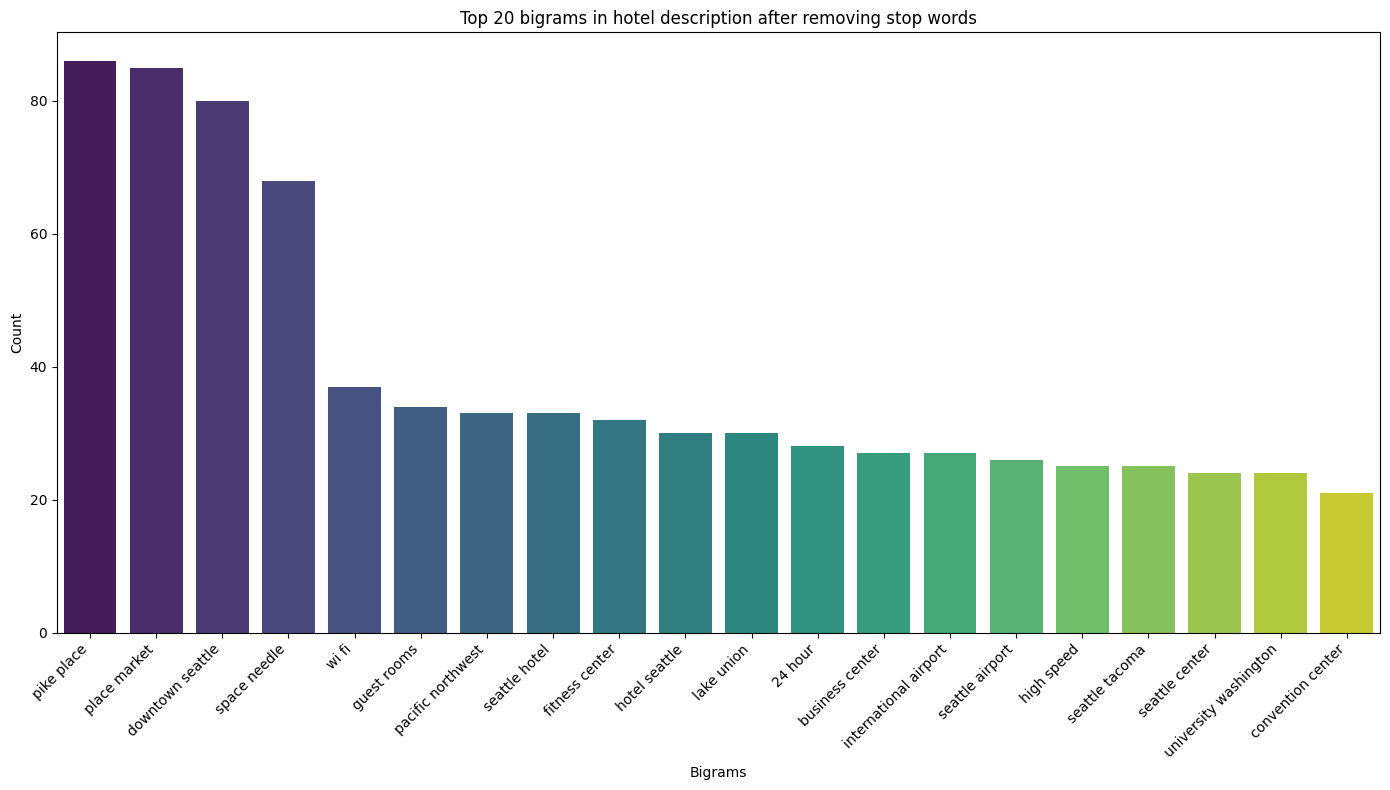

In [ ]:
import seaborn as sns

# Plotting with seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='desc', y='count', data=df4.sort_values(by='count', ascending=False), palette='viridis')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.title('Top 20 bigrams in hotel description after removing stop words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Top trigrams
* ### **CountVectorizer(ngram_range=(3, 3)):** Initializes a CountVectorizer to capture trigrams (three-word combinations).
* ### **vec.fit(corpus):** Fits the CountVectorizer to the corpus of hotel descriptions.
* ### **vec.transform(corpus):** Transforms the text data into a document-term matrix (DTM) where each column represents a trigram.
* ### **sum_words.sum(axis=0):** Sums up the frequency of each trigram across all descriptions.
* ### **sorted(words_freq, key=lambda x:** x[1], reverse=True): Sorts the trigrams by frequency in descending order.
* ### **return words_freq[:n]:** Returns the top n most frequent trigrams.

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='desc'>

Text(0.5, 0, 'Trigrams')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 trigrams in hotel description before removing stop words')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'pike place market'),
  Text(1, 0, 'the space needle'),
  Text(2, 0, 'the heart of'),
  Text(3, 0, 'in the heart'),
  Text(4, 0, 'located in the'),
  Text(5, 0, 'place market and'),
  Text(6, 0, 'the pacific northwest'),
  Text(7, 0, 'university of washington'),
  Text(8, 0, 'one of the'),
  Text(9, 0, 'tacoma international airport'),
  Text(10, 0, 'seattle tacoma international'),
  Text(11, 0, 'easy access to'),
  Text(12, 0, 'free wi fi'),
  Text(13, 0, 'of the city'),
  Text(14, 0, 'washington state convention'),
  Text(15, 0, 'of downtown seattle'),
  Text(16, 0, 'seattle art museum'),
  Text(17, 0, 'our hotel is'),
  Text(18, 0, 'state convention center'),
  Text(19, 0, 'hotel in seattle')])

<Figure size 1400x800 with 0 Axes>

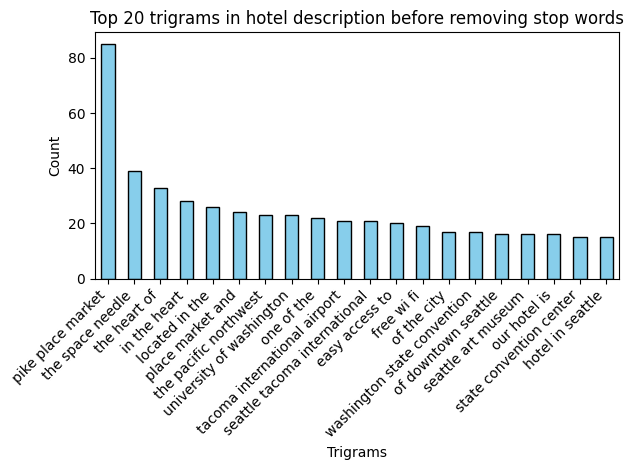

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming df['desc'] is your corpus
common_words = get_top_n_trigram(df['desc'], 20)
df5 = pd.DataFrame(common_words, columns=['desc', 'count'])

# Plotting with matplotlib
plt.figure(figsize=(14, 8))
df5.sort_values(by='count', ascending=False).plot(kind='bar', x='desc', y='count', legend=False, color='skyblue', edgecolor='black')
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.title('Top 20 trigrams in hotel description before removing stop words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

<ipython-input-60-958619ef7fd5>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='desc', ylabel='count'>

Text(0.5, 0, 'Trigrams')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 trigrams in hotel description before removing stop words')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'pike place market'),
  Text(1, 0, 'the space needle'),
  Text(2, 0, 'the heart of'),
  Text(3, 0, 'in the heart'),
  Text(4, 0, 'located in the'),
  Text(5, 0, 'place market and'),
  Text(6, 0, 'the pacific northwest'),
  Text(7, 0, 'university of washington'),
  Text(8, 0, 'one of the'),
  Text(9, 0, 'tacoma international airport'),
  Text(10, 0, 'seattle tacoma international'),
  Text(11, 0, 'easy access to'),
  Text(12, 0, 'free wi fi'),
  Text(13, 0, 'of the city'),
  Text(14, 0, 'washington state convention'),
  Text(15, 0, 'of downtown seattle'),
  Text(16, 0, 'seattle art museum'),
  Text(17, 0, 'our hotel is'),
  Text(18, 0, 'state convention center'),
  Text(19, 0, 'hotel in seattle')])

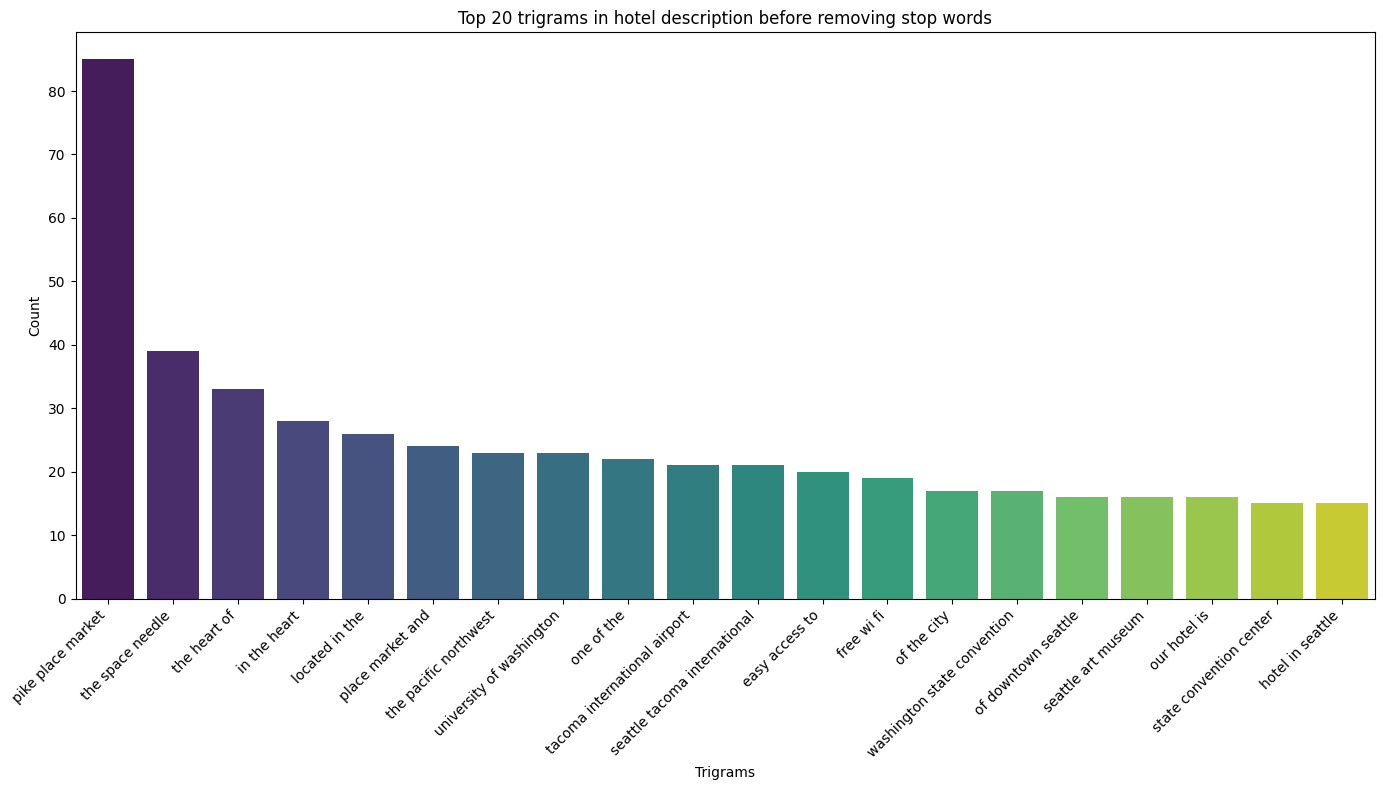

In [ ]:
import seaborn as sns

# Plotting with seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='desc', y='count', data=df5.sort_values(by='count', ascending=False), palette='viridis')
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.title('Top 20 trigrams in hotel description before removing stop words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This bar chart shows the most common three-word phrases (trigrams) from the hotel descriptions. It helps identify recurring themes or important phrases in the data.

## top trigrams

* ### **CountVectorizer(ngram_range=(3, 3), stop_words='english'):** Initializes the CountVectorizer to extract trigrams and ignore English stop words.
* ### **vec.fit(corpus):** Fits the vectorizer to the corpus of hotel descriptions.
* ### **vec.transform(corpus):** Transforms the text data into a document-term matrix (DTM) where each column corresponds to a trigram.
* ### **sum_words.sum(axis=0):** Calculates the total frequency of each trigram across all descriptions.
* ### **sorted(words_freq, key=lambda x: x[1], reverse=True):** Sorts the trigrams by frequency in descending order.
* ### **return words_freq[:n]:** Returns the top n most frequent trigrams.

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='desc'>

Text(0.5, 0, 'Trigrams')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 trigrams in hotel description after removing stop words')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'pike place market'),
  Text(1, 0, 'tacoma international airport'),
  Text(2, 0, 'seattle tacoma international'),
  Text(3, 0, 'free wi fi'),
  Text(4, 0, 'washington state convention'),
  Text(5, 0, 'seattle art museum'),
  Text(6, 0, 'place market seattle'),
  Text(7, 0, 'state convention center'),
  Text(8, 0, 'high speed internet'),
  Text(9, 0, 'space needle pike'),
  Text(10, 0, 'south lake union'),
  Text(11, 0, 'needle pike place'),
  Text(12, 0, 'downtown seattle hotel'),
  Text(13, 0, 'sea tac airport'),
  Text(14, 0, 'home away home'),
  Text(15, 0, 'heart downtown seattle'),
  Text(16, 0, 'link light rail'),
  Text(17, 0, 'free high speed'),
  Text(18, 0, 'just minutes away'),
  Text(19, 0, '24 hour fitness')])

<Figure size 1400x800 with 0 Axes>

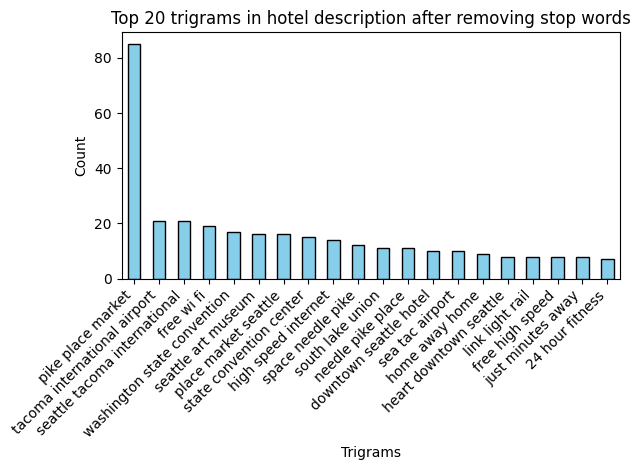

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming df['desc'] is your corpus
common_words = get_top_n_trigram(df['desc'], 20)
df6 = pd.DataFrame(common_words, columns=['desc', 'count'])

# Plotting with matplotlib
plt.figure(figsize=(14, 8))
df6.sort_values(by='count', ascending=False).plot(kind='bar', x='desc', y='count', legend=False, color='skyblue', edgecolor='black')
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.title('Top 20 trigrams in hotel description after removing stop words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

<ipython-input-62-b11bf8d1a2e1>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='desc', ylabel='count'>

Text(0.5, 0, 'Trigrams')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 20 trigrams in hotel description after removing stop words')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'pike place market'),
  Text(1, 0, 'tacoma international airport'),
  Text(2, 0, 'seattle tacoma international'),
  Text(3, 0, 'free wi fi'),
  Text(4, 0, 'washington state convention'),
  Text(5, 0, 'seattle art museum'),
  Text(6, 0, 'place market seattle'),
  Text(7, 0, 'state convention center'),
  Text(8, 0, 'high speed internet'),
  Text(9, 0, 'space needle pike'),
  Text(10, 0, 'south lake union'),
  Text(11, 0, 'needle pike place'),
  Text(12, 0, 'downtown seattle hotel'),
  Text(13, 0, 'sea tac airport'),
  Text(14, 0, 'home away home'),
  Text(15, 0, 'heart downtown seattle'),
  Text(16, 0, 'link light rail'),
  Text(17, 0, 'free high speed'),
  Text(18, 0, 'just minutes away'),
  Text(19, 0, '24 hour fitness')])

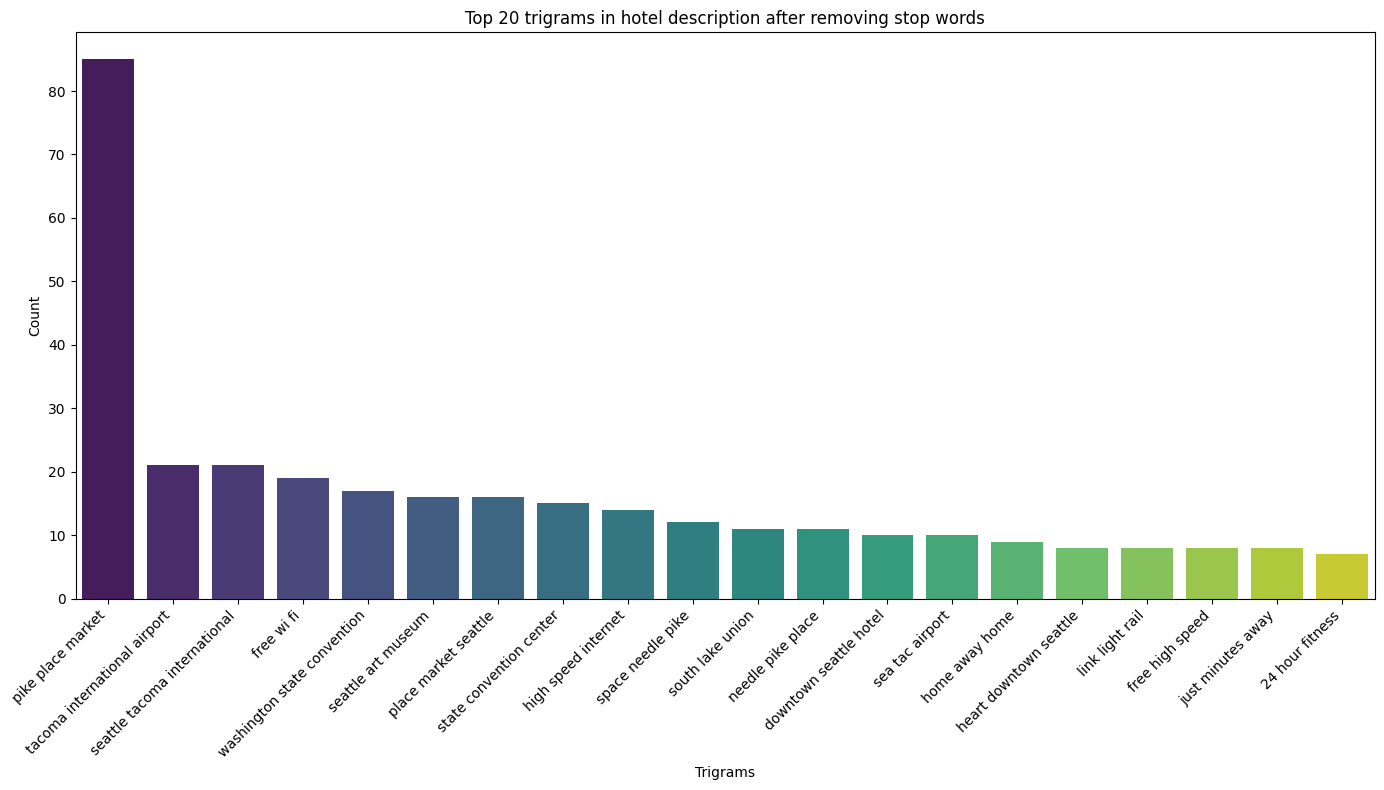

In [ ]:
import seaborn as sns

# Plotting with seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='desc', y='count', data=df6.sort_values(by='count', ascending=False), palette='viridis')
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.title('Top 20 trigrams in hotel description after removing stop words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df['word_count'] = df['desc'].apply(lambda x: len(str(x).split()))
desc_lengths = list(df['word_count'])
print("Number of descriptions:",len(desc_lengths),
      "\nAverage word count", np.average(desc_lengths),
      "\nMinimum word count", min(desc_lengths),
      "\nMaximum word count", max(desc_lengths))

Number of descriptions: 152 
Average word count 156.94736842105263 
Minimum word count 16 
Maximum word count 494


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='word_count', ylabel='Count'>

Text(0.5, 0, 'Word Count')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Word Count Distribution in Hotel Description')

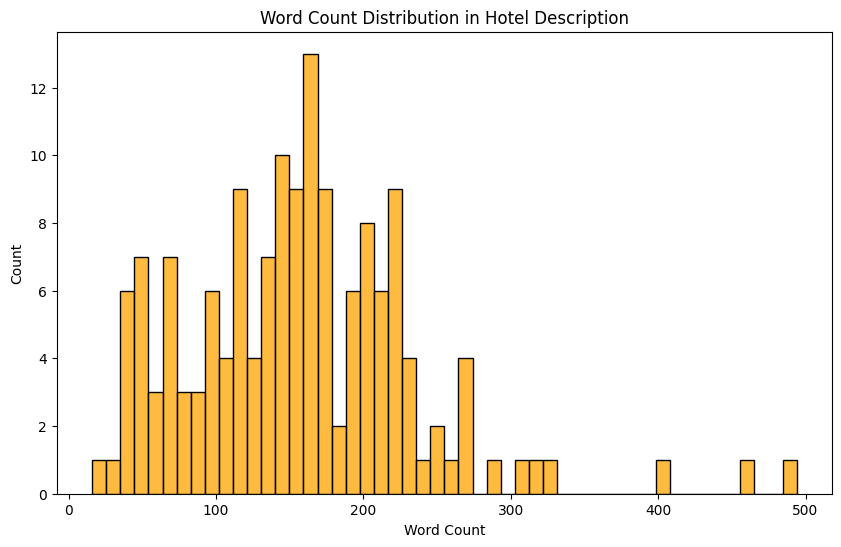

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=False, color='orange', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.title('Word Count Distribution in Hotel Description')
plt.show()


## text processing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## This function is used to preprocess text data by removing unnecessary characters, symbols, and stopwords. It helps in standardizing the text and making it suitable for further text analysis or modeling tasks.

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

df['desc_clean'] = df['desc'].apply(clean_text)

In [ ]:
df

,name,address,desc,word_count,desc_clean
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the...",184,located southern tip lake union hilton garden ...
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat...",152,located citys vibrant core sheraton grand seat...
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ...",147,located heart downtown seattle awardwinning cr...
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...,150,whats near hotel downtown seattle location bet...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...,151,situated amid incredible shopping iconic attra...
...,...,...,...,...,...
147,The Halcyon Suite Du Jour,"1125 9th Ave W, Seattle, WA 98119","Located in Queen Anne district, The Halcyon Su...",198,located queen anne district halcyon suite du j...
148,Vermont Inn,"2721 4th Ave, Seattle, WA 98121",Just a block from the world famous Space Needl...,98,block world famous space needle seattle center...
149,Stay Alfred on Wall Street,"2515 4th Ave, Seattle, WA 98121",Stay Alfred on Wall Street resides in the hear...,143,stay alfred wall street resides heart belltown...
150,Pike's Place Lux Suites by Barsala,"2nd Ave and Stewart St, Seattle, WA 98101",The perfect marriage of heightened convenience...,57,perfect marriage heightened convenience unbeat...


## functoins for recommendations

1.   **Import Statements:**

      *   **import pandas as pd:** For data manipulation.
      *   **from sklearn.feature_extraction.text import TfidfVectorizer:** For transforming text data into TF-IDF vectors.
      * **from sklearn.metrics.pairwise import linear_kernel:** For computing cosine similarities between TF-IDF vectors.


2.   **Data Preparation:**

      *   **df.set_index('name', inplace=True):** Sets the name column as the index of the DataFrame, which is useful for looking up hotels by their name.
      *  **tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=1, stop_words='english'):** Initializes the TF-IDF vectorizer to consider unigrams, bigrams, and trigrams. The min_df=1 parameter ensures that words appearing at least once are considered, and stop_words='english' removes common English stopwords.
      * **tfidf_matrix = tf.fit_transform(df['desc_clean']):** Transforms the cleaned descriptions into TF-IDF vectors.
      * **cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix):** Computes the cosine similarity between each pair of TF-IDF vectors, resulting in a similarity matrix.




In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming df is already defined and has 'desc_clean' and 'name' columns
df.set_index('name', inplace=True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(df['desc_clean'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index)

def recommendations(name, cosine_similarities=cosine_similarities):
    recommended_hotels = []

    # Getting the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)

    # Getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)

    # Populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])

    return recommended_hotels


In [ ]:
recommendations('Hilton Seattle Airport & Conference Center')


['Embassy Suites by Hilton Seattle Tacoma International Airport',
 'DoubleTree by Hilton Hotel Seattle Airport',
 'Seattle Airport Marriott',
 'Motel 6 Seattle Sea-Tac Airport South',
 'Econo Lodge SeaTac Airport North',
 'Four Points by Sheraton Downtown Seattle Center',
 'Knights Inn Tukwila',
 'Econo Lodge Renton-Bellevue',
 'Hampton Inn Seattle/Southcenter',
 'Radisson Hotel Seattle Airport']

## A good test on whether our similarity works is that the content based recommender returns all airport hotels when an airport hotel is a seed.

We can also ask Google. The following are recommended by Google for “Hilton Seattle Airport & Conference Center”:

In [ ]:
recommendations("The Bacon Mansion Bed and Breakfast")


['11th Avenue Inn Bed and Breakfast',
 'Shafer Baillie Mansion Bed & Breakfast',
 'Chittenden House Bed and Breakfast',
 'Gaslight Inn',
 'Bed and Breakfast Inn Seattle',
 'Silver Cloud Hotel - Seattle Broadway',
 'Hyatt House Seattle',
 'Mozart Guest House',
 'Quality Inn & Suites Seattle Center',
 'MarQueen Hotel']